In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import mlutils 

warnings.filterwarnings('ignore')

Ingesting the file

In [2]:
def read_csv(path : str) -> pd.DataFrame:

    return pd.read_csv(path, index_col='id') 

In [3]:
df = read_csv("./data/train.csv")
df.head()

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
id,,,,,,,,,,,,
0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


Explore the file

In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   age               630000 non-null  int64  
 1   gender            630000 non-null  str    
 2   course            630000 non-null  str    
 3   study_hours       630000 non-null  float64
 4   class_attendance  630000 non-null  float64
 5   internet_access   630000 non-null  str    
 6   sleep_hours       630000 non-null  float64
 7   sleep_quality     630000 non-null  str    
 8   study_method      630000 non-null  str    
 9   facility_rating   630000 non-null  str    
 10  exam_difficulty   630000 non-null  str    
 11  exam_score        630000 non-null  float64
dtypes: float64(4), int64(1), str(7)
memory usage: 57.7 MB


In [5]:
for col in df.select_dtypes(['object', 'int64']):

    print(f"\nThe column values for {col} are : {df[col].value_counts()}")


The column values for age are : age
21    86620
23    82872
20    80742
19    78885
24    77111
18    75632
22    74950
17    73188
Name: count, dtype: int64

The column values for gender are : gender
other     211097
male      210593
female    208310
Name: count, dtype: int64

The column values for course are : course
b.tech     131236
b.sc       111554
b.com      110932
bca         88721
bba         75644
ba          61989
diploma     49924
Name: count, dtype: int64

The column values for internet_access are : internet_access
yes    579423
no      50577
Name: count, dtype: int64

The column values for sleep_quality are : sleep_quality
poor       213675
good       213089
average    203236
Name: count, dtype: int64

The column values for study_method are : study_method
coaching         131697
self-study       131131
mixed            123086
group study      123009
online videos    121077
Name: count, dtype: int64

The column values for facility_rating are : facility_rating
medium    21

In [6]:
df.isnull().sum()

age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64

Univariate analysis

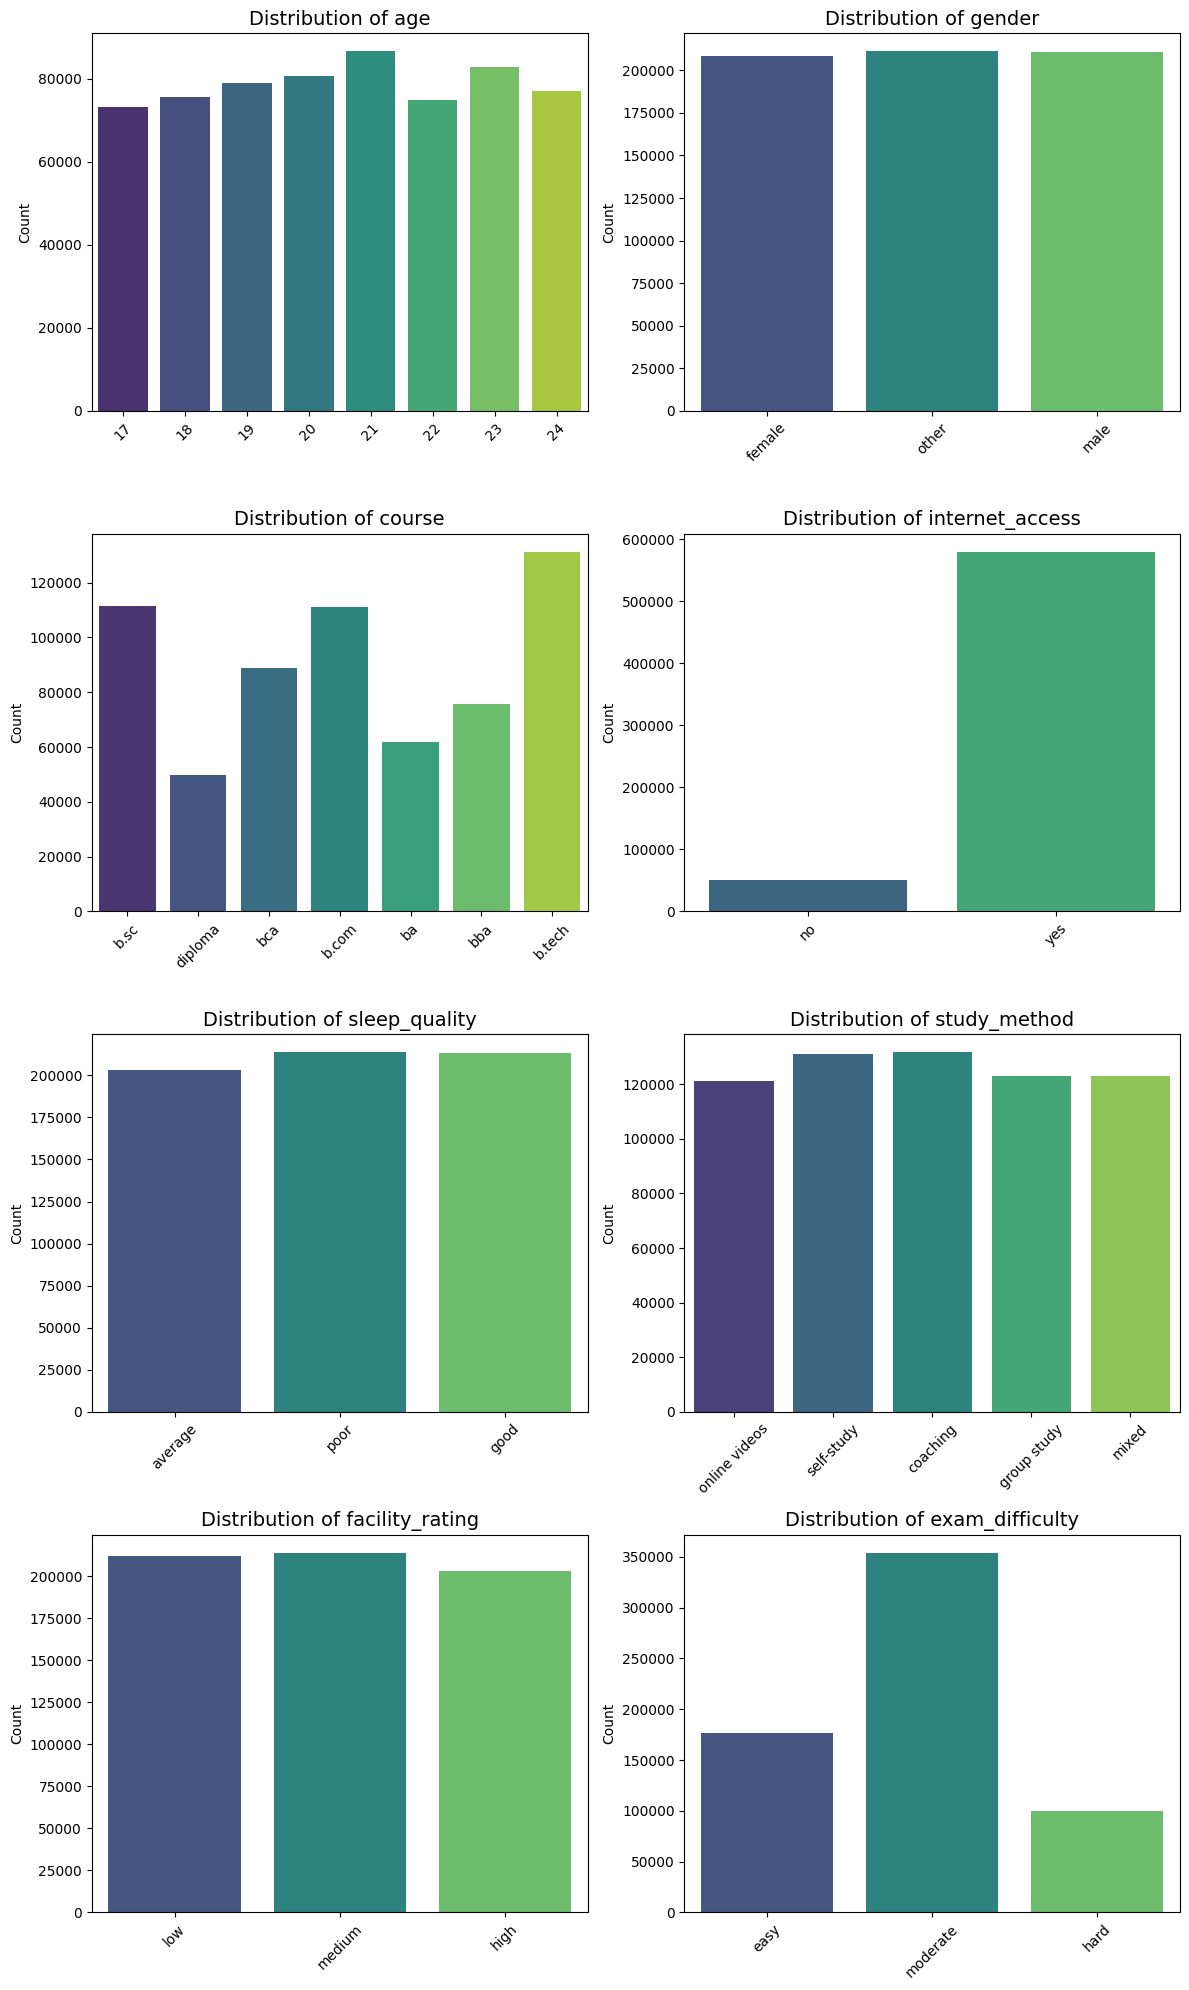

In [7]:
def plot_cat_vars(
    df: pd.DataFrame
    ) -> None:
    cols = df.select_dtypes(['object', 'int64']).columns
    nrows = int(np.ceil(len(cols) / 2))
    
    # Create subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(12, 5 * nrows))
    axes = axes.flatten()
    
    for i, col in enumerate(cols):

        sns.countplot(data=df, x=col, ax=axes[i], palette='viridis')
        axes[i].set_title(f'Distribution of {col}', fontsize=14)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)
    
    for j in range(len(cols), len(axes)):
        axes[j].axis('off')
        
    plt.tight_layout()
    plt.show()

# Run the function
plot_cat_vars(df)

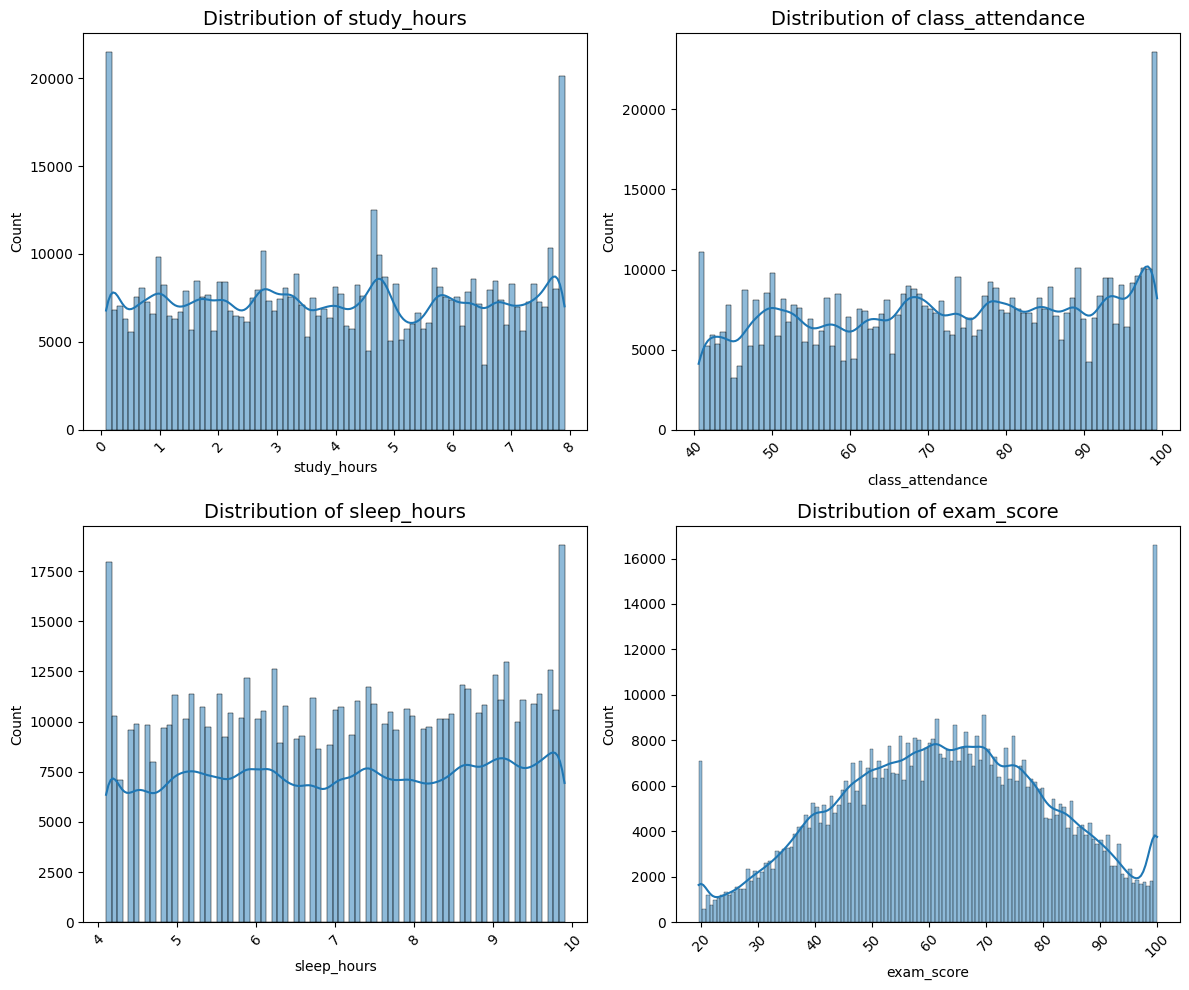

In [8]:
def plot_cont_vars(
    df : pd.DataFrame
) -> None:

    cols = df.select_dtypes(exclude=['object', 'category', 'int64']).columns
    nrows = int(np.ceil(len(cols)/2))
    ncols = 2
    
    # Create subplots
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 5 * nrows))
    ax = ax.flatten()
    
    for i, col in enumerate(cols):

        sns.histplot(data=df, x=col, ax=ax[i], palette='viridis', kde=True)
        ax[i].set_title(f'Distribution of {col}', fontsize=14)
        ax[i].set_ylabel('Count')
        ax[i].tick_params(axis='x', rotation=45)
    
    for j in range(len(cols), len(ax)):
        ax[j].axis('off')
        
    plt.tight_layout()
    plt.show()

    pass


plot_cont_vars(df)

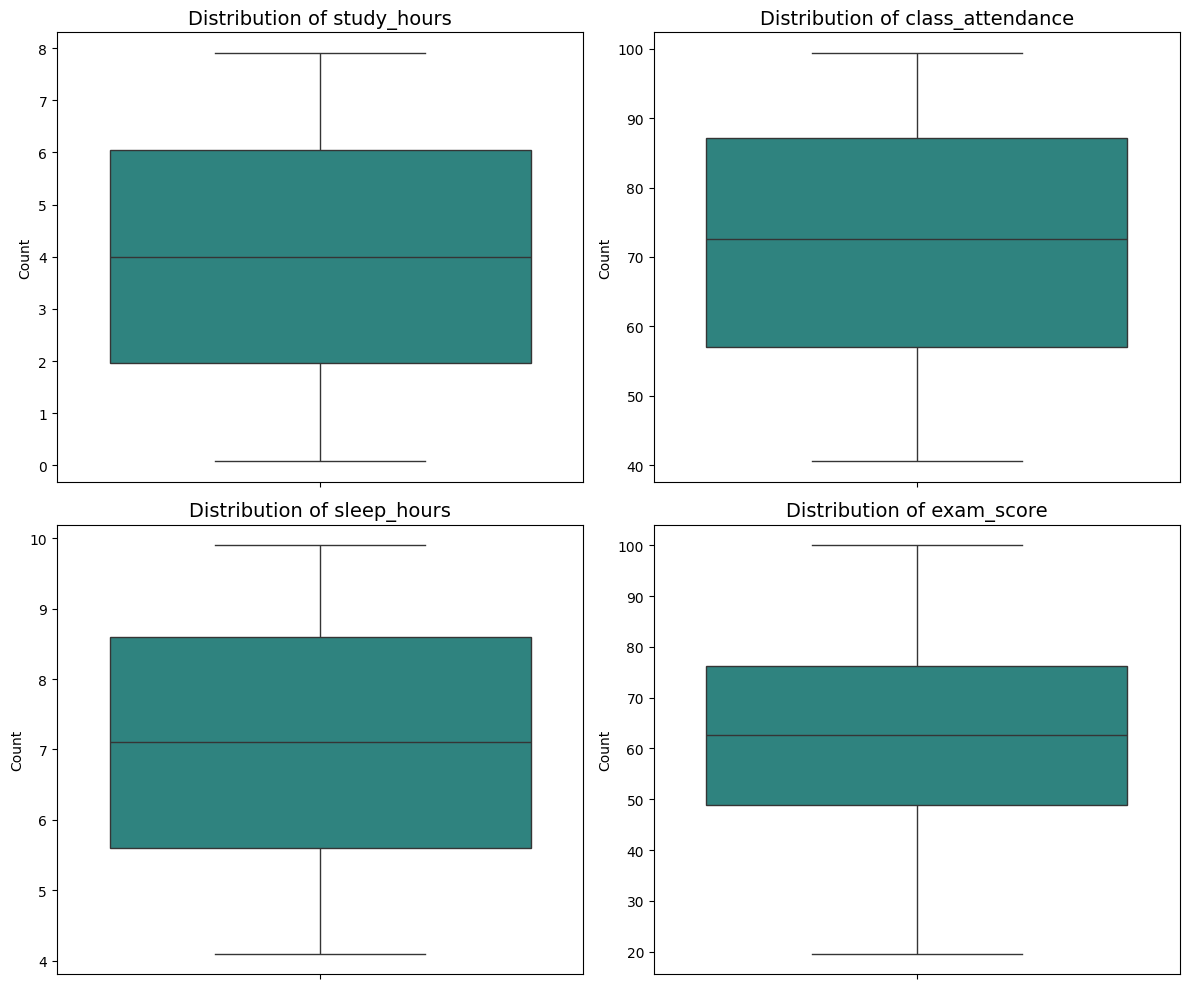

In [9]:
def plot_outliers(df: pd.DataFrame) -> None:
    
    cols = df.select_dtypes(exclude=['object', 'category', 'int64']).columns
    nrows = int(np.ceil(len(cols)/2))
    ncols = 2
    
    # Create subplots
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 5 * nrows))
    ax = ax.flatten()
    
    for i, col in enumerate(cols):

        sns.boxplot(data=df[col], ax=ax[i], palette='viridis')  #type: ignore
        ax[i].set_title(f'Distribution of {col}', fontsize=14)
        ax[i].set_ylabel('Count')
        ax[i].tick_params(axis='x', rotation=45)
    
    for j in range(len(cols), len(ax)):
        ax[j].axis('off')
        
    plt.tight_layout()
    plt.show()

    pass

plot_outliers(df)

Bivariate analysis

In [10]:
#Before bivariate analysis, we need a way to encode the categorical variables
#For analysis, we can use a label encoder, later we can use complex methods
cat_df = df.select_dtypes(include='object')
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_df.columns:

    cat_df[col] = le.fit_transform(df[col])

cat_df.head()


,gender,course,internet_access,sleep_quality,study_method,facility_rating,exam_difficulty
id,,,,,,,
0,0,1,0,0,3,1,0
1,2,6,1,2,4,2,2
2,0,1,1,2,0,0,2
3,1,1,1,0,1,0,2
4,1,5,1,1,4,0,0


In [11]:
label_encoded_df = df.select_dtypes(exclude='object').merge(cat_df, how='outer', on='id')
label_encoded_df.head()

,age,study_hours,class_attendance,sleep_hours,exam_score,gender,course,internet_access,sleep_quality,study_method,facility_rating,exam_difficulty
id,,,,,,,,,,,,
0,21,7.91,98.8,4.9,78.3,0,1,0,0,3,1,0
1,18,4.95,94.8,4.7,46.7,2,6,1,2,4,2,2
2,20,4.68,92.6,5.8,99.0,0,1,1,2,0,0,2
3,19,2.00,49.5,8.3,63.9,1,1,1,0,1,0,2
4,23,7.65,86.9,9.6,100.0,1,5,1,1,4,0,0


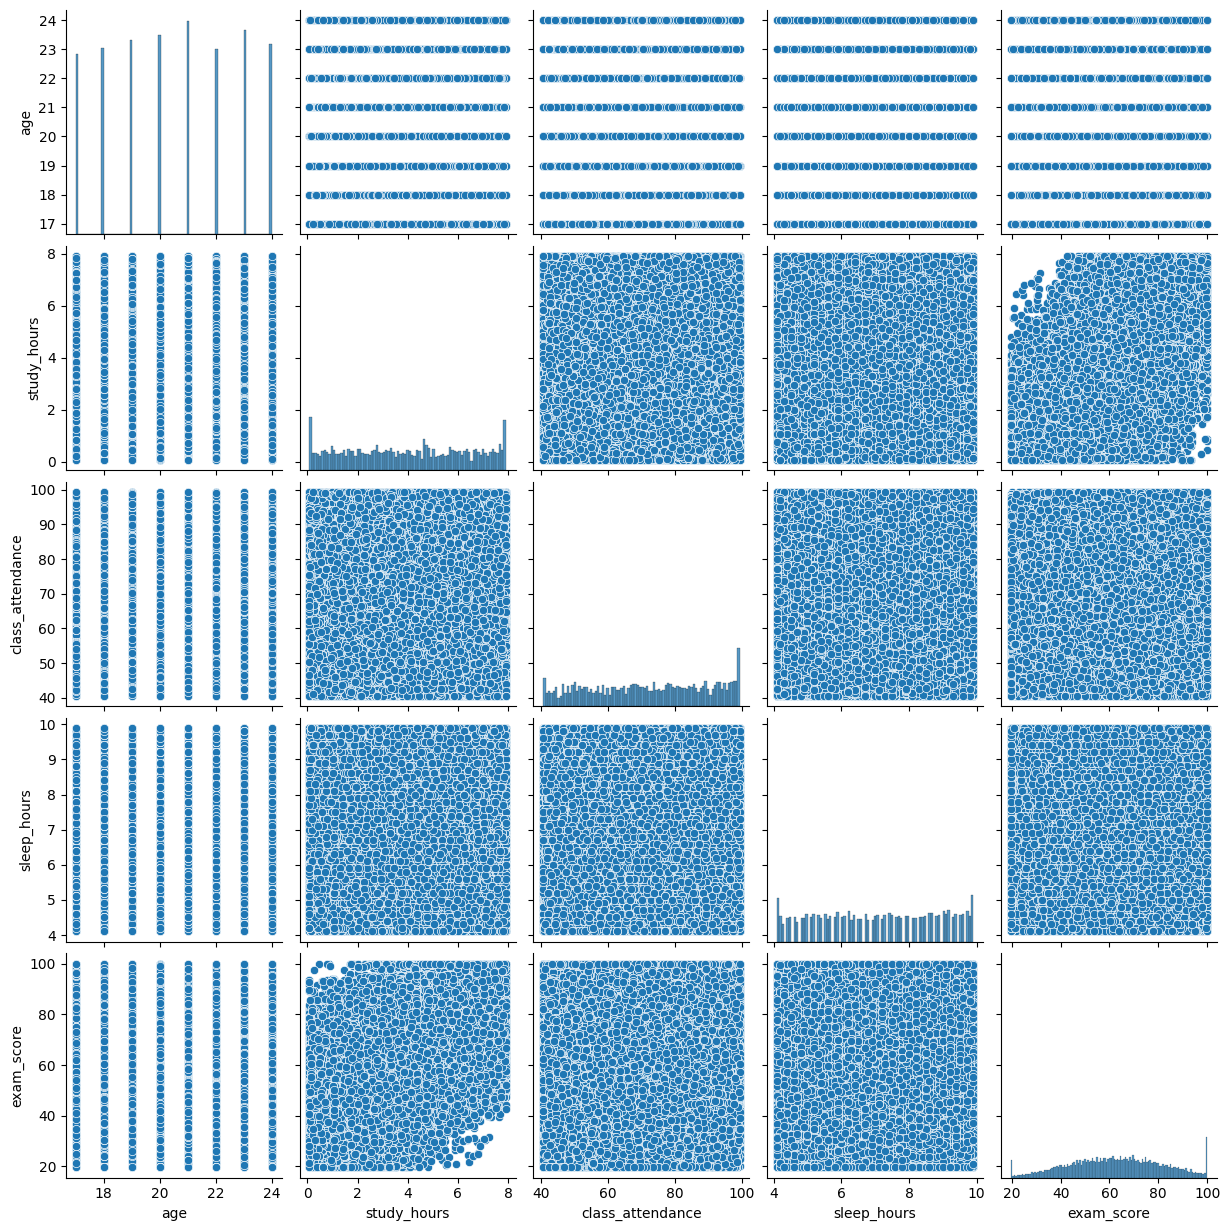

In [12]:
sns.pairplot(df)

Check correlation to target variable and collinearity among numeric feats

<Axes: title={'center': 'Feature Correlation (upper triangle)'}>

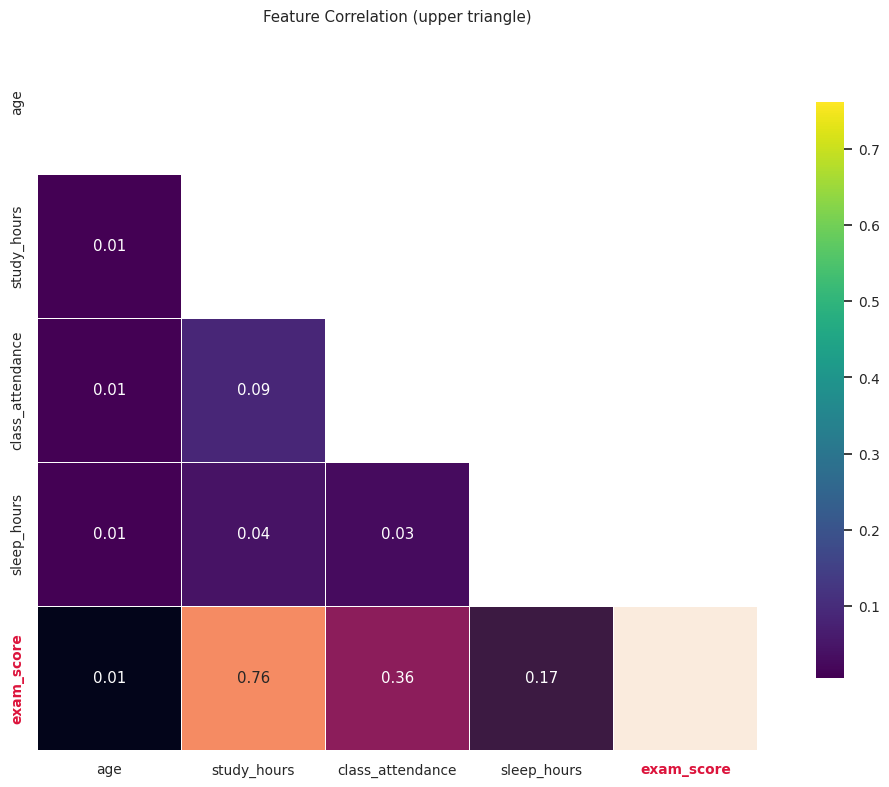

In [13]:
def plot_corr(df, target=None, cmap="viridis", target_cmap="rocket"):
    sns.set_theme(style="white", font_scale=0.9)

    corr = df.corr(numeric_only=True)
    mask = np.triu(np.ones_like(corr, dtype=bool))

    plt.figure(figsize=(12, 8))
    ax = sns.heatmap(
        corr,
        mask=mask,
        cmap=cmap,
        annot=True,
        fmt=".2f",
        linewidths=0.5,
        square=True,
        cbar_kws={"shrink": 0.8},
    )

    if target is not None:
        if target not in corr.columns:
            raise ValueError(f"target '{target}' not in columns")

        # Show only target row/col (lower triangle) with a different cmap
        idx = corr.columns.get_loc(target)
        mask_target = np.ones_like(corr, dtype=bool)
        mask_target[idx, :] = False
        mask_target[:, idx] = False
        mask_target |= np.triu(np.ones_like(corr, dtype=bool), 1)

        sns.heatmap(
            corr,
            mask=mask_target,
            cmap=target_cmap,
            annot=False,
            cbar=False,
            linewidths=0.5,
            square=True,
            ax=ax,
        )

        # Emphasize target labels
        for label in ax.get_xticklabels() + ax.get_yticklabels():
            if label.get_text() == target:
                label.set_weight("bold")
                label.set_color("crimson")

    plt.title("Feature Correlation (upper triangle)")
    plt.tight_layout()
    return ax

plot_corr(df, 'exam_score')

Check categorical variable

In [18]:
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

def compute_mutual_info(df: pd.DataFrame, target: str) -> pd.Series:
    X = df.drop(columns=[target])
    y = df[target]

    if y.dtype == 'object' or y.dtype.name == 'category':
        mi = mutual_info_classif(X.select_dtypes(exclude=['object', 'category']), y)
    else:
        mi = mutual_info_regression(X.select_dtypes(exclude=['object', 'category']), y)

    mi_series = pd.Series(mi, index=X.select_dtypes(exclude=['object', 'category']).columns)
    mi_series = mi_series.sort_values(ascending=False)

    return mi_series
mi_scores = compute_mutual_info(label_encoded_df, 'exam_score')
print("Mutual Information Scores:\n", mi_scores)

Mutual Information Scores:
 study_hours         0.912960
class_attendance    0.302276
sleep_hours         0.071792
study_method        0.042378
sleep_quality       0.035387
facility_rating     0.029111
course              0.018896
age                 0.012893
exam_difficulty     0.008009
gender              0.002670
internet_access     0.001421
dtype: float64


Check collinearity between cat features

In [29]:
from scipy.stats import chi2_contingency
from itertools import combinations

def cat_cat_association(
    df: pd.DataFrame,
    categorical_cols: list[str] | None = None,
    bias_correction: bool = True
):
    """
    Computes pairwise Chi-square p-values and Cramér's V for all categorical columns.

    Returns:
        cramers_v_df: symmetric DataFrame of Cramér's V
        p_value_df: symmetric DataFrame of p-values
    """

    # 1. Detect categorical columns if not provided
    if categorical_cols is None:
        categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

    # Initialize result matrices
    cramers_v_df = pd.DataFrame(
        0.0, index=categorical_cols, columns=categorical_cols
    )
    p_value_df = pd.DataFrame(
        1.0, index=categorical_cols, columns=categorical_cols
    )

    # 2. Pairwise computation
    for col_x, col_y in combinations(categorical_cols, 2):

        contingency = pd.crosstab(df[col_x], df[col_y])

        # Skip degenerate cases
        if contingency.shape[0] < 2 or contingency.shape[1] < 2:
            continue

        chi2, p, _, _ = chi2_contingency(contingency)
        n = contingency.values.sum()
        r, k = contingency.shape

        # Cramér's V
        if bias_correction:
            phi2 = max(0, chi2 / n - ((k - 1) * (r - 1)) / (n - 1))
            r_corr = r - ((r - 1) ** 2) / (n - 1)
            k_corr = k - ((k - 1) ** 2) / (n - 1)
            v = np.sqrt(phi2 / max(1e-12, min(k_corr - 1, r_corr - 1)))
        else:
            v = np.sqrt((chi2 / n) / min(k - 1, r - 1))

        # Fill symmetric matrices
        cramers_v_df.loc[col_x, col_y] = v
        cramers_v_df.loc[col_y, col_x] = v

        p_value_df.loc[col_x, col_y] = p
        p_value_df.loc[col_y, col_x] = p

    # 3. Diagonal (safe assignment)
    for col in categorical_cols:
        cramers_v_df.loc[col, col] = 1.0
        p_value_df.loc[col, col] = 0.0

    return cramers_v_df, p_value_df


cramers_v_df, p_value_df = cat_cat_association(df)
redundant = (cramers_v_df > 0.3) & (p_value_df < 0.05)
redundant

,gender,course,internet_access,sleep_quality,study_method,facility_rating,exam_difficulty
gender,True,False,False,False,False,False,False
course,False,True,False,False,False,False,False
internet_access,False,False,True,False,False,False,False
sleep_quality,False,False,False,True,False,False,False
study_method,False,False,False,False,True,False,False
facility_rating,False,False,False,False,False,True,False
exam_difficulty,False,False,False,False,False,False,True


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import kruskal
from typing import Optional

def cat_num_kruskal_wallis(
    df: pd.DataFrame,
    target: str,
    categorical_cols: Optional[list[str]] = None,
    return_filtered: bool = False,
    effect_size_threshold: float = 0.01,
    p_value_threshold: float = 0.05
) -> pd.DataFrame:
    """
    Kruskal–Wallis test for categorical features vs numeric target.
    
    Returns:
        DataFrame with columns:
        ['H_statistic', 'p_value', 'epsilon_squared']
    """

    if categorical_cols is None:
        categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

    results = {}

    for col in categorical_cols:
        if col == target:
            continue

        groups = [
            df.loc[df[col] == level, target]
            for level in df[col].dropna().unique()
        ]

        # Need at least 2 non-empty groups
        if len(groups) < 2 or any(len(g) == 0 for g in groups):
            results[col] = {
                "H_statistic": np.nan,
                "p_value": np.nan,
                "epsilon_squared": np.nan
            }
            continue

        H, p = kruskal(*groups)

        n = sum(len(g) for g in groups) #type: ignore
        k = len(groups)

        # Epsilon-squared effect size (recommended for KW)
        epsilon_sq = (H - k + 1) / (n - k) if n > k else np.nan

        results[col] = {
            "H_statistic": float(H),
            "p_value": float(p),
            "epsilon_squared": float(max(0, epsilon_sq))
        }

    result_df = pd.DataFrame.from_dict(results, orient="index") \
                            .sort_values("epsilon_squared", ascending=False)

    if return_filtered:
        return result_df.loc[
            (result_df["epsilon_squared"] >= effect_size_threshold) &
            (result_df["p_value"] < p_value_threshold)
        ]

    return result_df

cat_num_kruskal_wallis(df, target='exam_score', return_filtered=True)

,H_statistic,p_value,epsilon_squared
sleep_quality,33167.891096,0.0,0.052645
study_method,29548.419802,0.0,0.046896
facility_rating,20684.097092,0.0,0.032829


In [38]:
from mlutils.features_handling.feature_selection import InFeatureInteraction

obj = InFeatureInteraction()

cramers, p_values, redundant = obj.cat_cat_association(
    df,
    categorical_cols=df.select_dtypes(include=['object', 'category']).columns.tolist(),
    redundancy_matrix=True
)

pd.DataFrame(redundant)

,gender,course,internet_access,sleep_quality,study_method,facility_rating,exam_difficulty
gender,True,False,False,False,False,False,False
course,False,True,False,False,False,False,False
internet_access,False,False,True,False,False,False,False
sleep_quality,False,False,False,True,False,False,False
study_method,False,False,False,False,True,False,False
facility_rating,False,False,False,False,False,True,False
exam_difficulty,False,False,False,False,False,False,True
